<function matplotlib.pyplot.show>

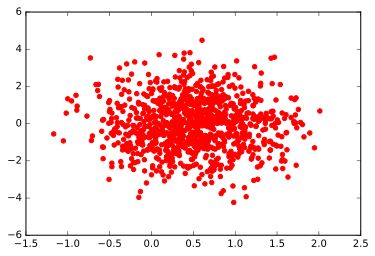

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

theta_a = []
#for posterior distribution
mu_a = [0.5, 0]
sigma_a = [[0.3, 0], [0, 2]]

# theta_b = []
# #for posterior distribution
# mu_b = [0, 0.5]
# sigma_b = [[2, 0], [0, 0.3]]

np.random.seed(0)
theta_a = np.random.multivariate_normal(mu_a, sigma_a, 1000)
# theta_b = np.random.multivariate_normal(mu_b, sigma_b, 1000)
plt.scatter( theta_a[:,0], theta_a[:,1], color='red')
# plt.scatter( theta_b[:,0], theta_b[:,1], color='blue')
plt.show



There is a nice discussion that is intuitive and easy to follow on Metropolis-Hastings Algorithm on [Wikipedia](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm). [Here](http://galton.uchicago.edu/~eichler/stat24600/Handouts/l12.pdf) are some more nice notes on MH. Implementation of Metropolis-Hastings Algorithm is followed [Here](https://github.com/bikz05/ipython-notebooks/blob/master/probabilistic-robotics/metropolis-hastings-algos.ipynb).

The pseudo code for Metropolis-Hastings Algorithm is discussed below --

* Initialize $x_0$.
    * For $i = 1 \text{ to } N-1$
        * Sample $u \sim \mathcal{U}_{[0, 1]}$
        * Sample $x^{*} \sim q(x|x^{(i)})$
        * If $u < \mathcal{A}(x^{(i)}, x^*) = \min\{\frac{p(x^*)q(x^{(i)}|x^*)}{p(x^{(i)})q(x^*|x^{(i)})}\}$
            * $x^{i+1} = x^{*}$
        * else
            * $x^{i+1} = x^{(i)}$

In [7]:
# Assumption: p(x) is directly proportional to q(x|x_i-1)
def p(x):
    return norm((0.5,0), (0.3, 0.2)).pdf(x) 

# Initialize x_0
x = [5.0,5.0]
# Number of samples
N = 10000
# I think when we are not sure
# we should keep the `sigma` as large
# as possible, so that we sample the entire space
sigma = [10.0, 10.0]
# List of sampled points
x_sampled = np.zeros((N,2))
for i in range(N-1):
    # `u` lies in [0, 1]
    u = np.random.uniform()
    # Sample `x_star` from a gaussian distribution centered around `x`
    x_star = norm(x, sigma).rvs()
    if u < min((p(x_star)*norm(x_star, sigma).pdf(x))/(p(x)*norm(x, sigma).pdf(x_star))):
         x = x_star
    x_sampled[i] = x

<function matplotlib.pyplot.show>

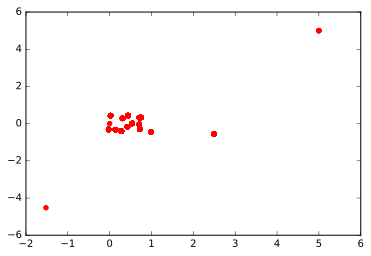

In [8]:
plt.scatter( x_sampled[:,0], x_sampled[:,1], color='red')
plt.show